# Insurance Claims Analysis and Premium Prediction Dashboard

This project analyzes health insurance claims data to identify key trends, such as high-risk, regional claim patterns, and predictors of claim amounts. The objective is to predict future premium levels and inform better pricing strategies using exploratory data analysis and linear regression.

In [44]:
# Load the CSV file from the data folder
import pandas as pd
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\insurance-claims-dashboard\data\insurance.csv")
# Show first 5 rows
df.head()


,age,sex,bmi,children,smoker,region,amount
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# check for missing values and data types
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   amount    1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,amount
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style="whitegrid")

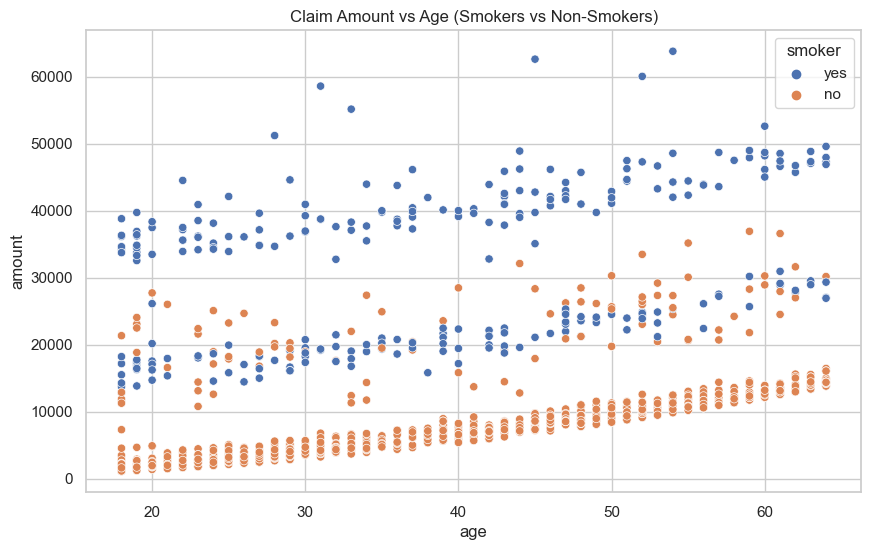

In [19]:
plt.figure(figsize=(10, 6))
# to show whether older or smokers claim more
sns.scatterplot(x='age', y='amount', hue='smoker', data=df)
plt.title("Claim Amount vs Age (Smokers vs Non-Smokers)")
plt.show()

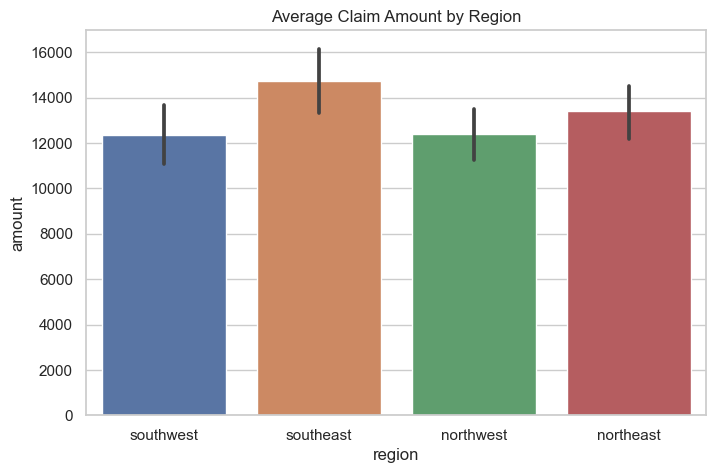

In [21]:
# the region that incurs more claims
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='amount', data=df, estimator='mean')
plt.title("Average Claim Amount by Region")
plt.show()

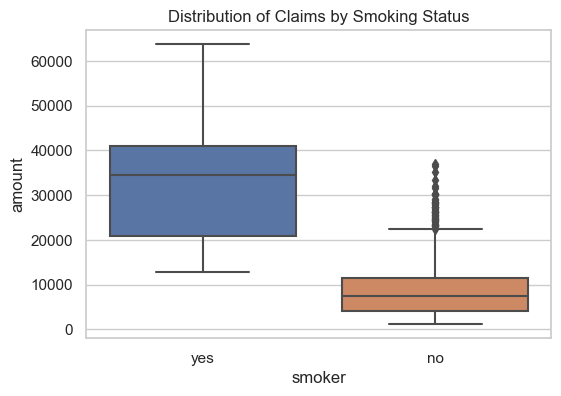

In [24]:
# shows whether smoking has any effect on incurred claims, this could help to justify premium increment
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='amount', data=df)
plt.title("Distribution of Claims by Smoking Status")
plt.show()

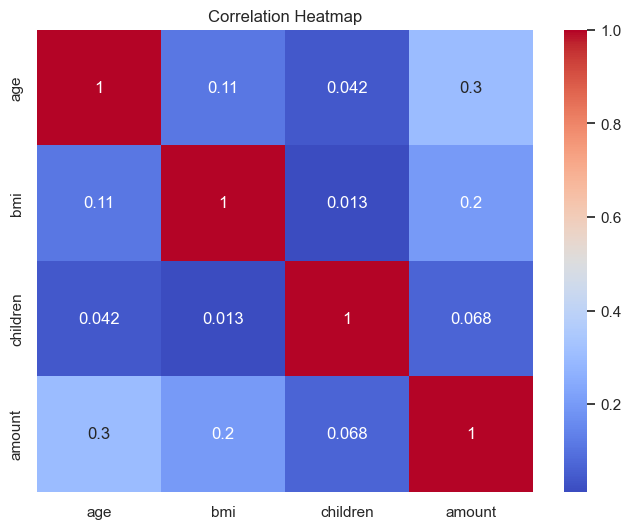

In [25]:
# the numeric data (age/bmi) closer to claim incures
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

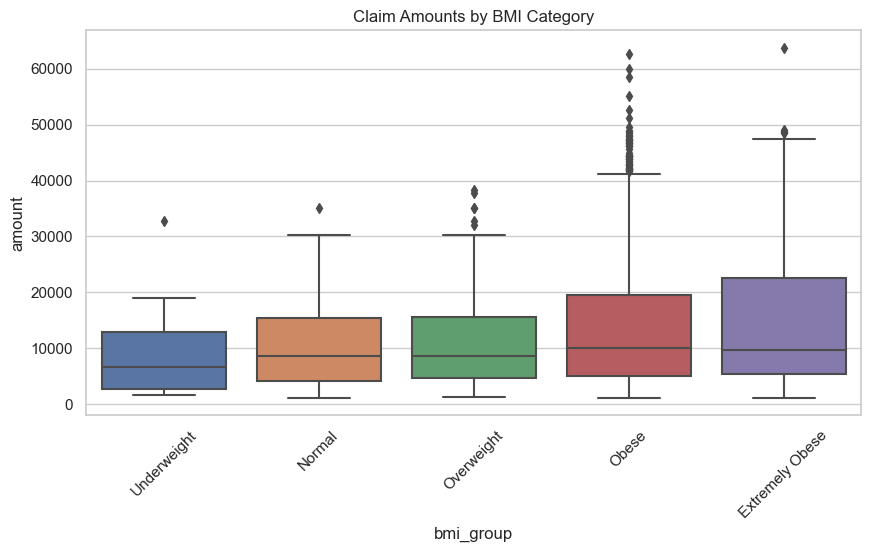

In [26]:
df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 40, 60], 
                         labels=["Underweight", "Normal", "Overweight", "Obese", "Extremely Obese"])

plt.figure(figsize=(10, 5))
sns.boxplot(x='bmi_group', y='amount', data=df)
plt.title("Claim Amounts by BMI Category")
plt.xticks(rotation=45)
plt.show()

In [29]:
# finds best fitting linear relationship between predictors (age, bmi, smoker) and target variable (amount)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
# convert smoker to 1, non-smoker to 0 and name the axis
df_encoded = pd.get_dummies(df[['age', 'bmi', 'smoker']], drop_first=True)
X = df_encoded
y = df['amount']

In [31]:
# 80% training and 20% testing to evaluate model performance with random state as 42, ensuring reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
print("Model R^2 Score:", model.score(X_test, y_test))

Model R^2 Score: 0.7776932310583374


In [36]:
# Trying to train a model for premium calculation based on assumption
df["estimated_premium"] = df["amount"] * 0.1  # Assuming 10% of claims as premium

In [37]:
from sklearn.linear_model import LinearRegression

X = df_encoded  # Features like age, BMI, smoker status
y = df["estimated_premium"]  # Target: Premium estimate

model_premium = LinearRegression()
model_premium.fit(X, y)

print("Premium Model R^2 Score:", model_premium.score(X, y))


Premium Model R^2 Score: 0.7474771588119513


In [39]:
import numpy as np

df["adjusted_premium"] = df["amount"] * np.where(df["smoker"] == "yes", 1.2, 1.0) * np.where(df["age"] > 50, 1.1, 1.0)


In [40]:
print(df["adjusted_premium"].describe())


count     1338.000000
mean     15101.414892
std      15243.047157
min       1121.873900
25%       4740.287150
50%       9565.009950
75%      18830.564113
max      84176.964973
Name: adjusted_premium, dtype: float64


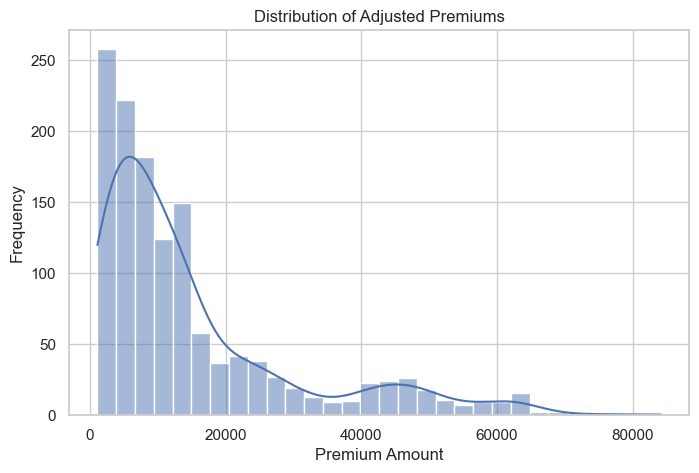

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["adjusted_premium"], bins=30, kde=True)
plt.title("Distribution of Adjusted Premiums")
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.show()

In [42]:
df.groupby("smoker")["adjusted_premium"].mean()

smoker
no      8805.862393
yes    39548.377881
Name: adjusted_premium, dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression
X = df[["age", "bmi", "smoker"]]  # Features
y = df["adjusted_premium"]  # Target variable

X = pd.get_dummies(X, drop_first=True)  # Convert categorical data
model = LinearRegression()
model.fit(X, y)

print("Model R^2 Score:", model.score(X, y))

Model R^2 Score: 0.7835602935561309


## Premium Prediction Model

Developed a linear regression model to estimate adjusted premiums based on:
- **Age**
- **BMI**
- **Smoking status**


In [52]:
# Predict premium for sample A (non-smoker)
sample = pd.DataFrame({
    'age': [45],
    'bmi': [32.5],
    'smoker_yes': [0]  # 1 = smoker, 0 = non-smoker
})

predicted_premium = model.predict(sample)
print(f"Estimated Premium: ₦{predicted_premium[0]:,.2f}")

Estimated Premium: ₦11,319.17


In [51]:
# Predict premium for sample B (smoker)
sample = pd.DataFrame({
    'age': [45],
    'bmi': [32.5],
    'smoker_yes': [1]  # 1 = smoker, 0 = non-smoker
})

predicted_premium = model.predict(sample)
print(f"Estimated Premium: ₦{predicted_premium[0]:,.2f}")

Estimated Premium: ₦42,315.22
